In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, BatchNormalization,Dropout, Conv1D, MaxPooling1D, concatenate, Activation

In [11]:
df = pd.read_csv('./train.csv')

df_scaled = df
scale_cols = df_scaled[df_scaled.columns.difference(['leaktype'])].columns

#입력 데이터에 대해 표준화 진행 후 정답 데이터 추가

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled, columns=scale_cols)

df_scaled['leaktype'] = df['leaktype'].values

#dataframe shuffle

df_scaled = df_scaled.sample(frac=1).reset_index(drop=True)

#입력 데이터와 정답 데이터 분리

feature_df = df_scaled[df_scaled.columns.difference(['leaktype'])]
label_df = df_scaled['leaktype']

#other : 0, noise : 1, normal : 2, in : 3, out : 4

label_df = label_df.replace('other', 0)
label_df = label_df.replace('noise', 1)
label_df = label_df.replace('normal', 2)
label_df = label_df.replace('in', 3)
label_df = label_df.replace('out', 4)

#from dataframe to numpy

feature_np = feature_df.to_numpy().astype('float32')
label_np = label_df.to_numpy().astype('float32')

#split train datasets and validation datasets

split = 0.3

test_num = int(split*len(label_np))

x_valid = feature_np[0:test_num]
y_valid = label_np[0:test_num]

x_train = feature_np[test_num:]
y_train = label_np[test_num:]

#one-hot encoding

y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=5)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)

# train, test dataset을 0-60, 185-250, 185-330, 370-, 240-300, 330-370, 370-450, 290-400 구간으로 나누기
# 50이하인 구간이거나 뚜렷한 특징이 없는 구간은 삭제

df1_x_train = x_train[:, 0:60]
df2_x_train = x_train[:, 185:250]
df3_x_train = x_train[:, 185:330]
df4_x_train = x_train[:, 370:]
df5_x_train = x_train[:, 240:300]
df6_x_train = x_train[:, 330:370]
df7_x_train = x_train[:, 370:450]
df8_x_train = x_train[:, 290:400]
entire_x_train = x_train[:,:]

df1_x_valid = x_valid[:, 0:60]
df2_x_valid = x_valid[:, 185:250]
df3_x_valid = x_valid[:, 185:330]
df4_x_valid = x_valid[:, 370:]
df5_x_valid = x_valid[:, 240:300]
df6_x_valid = x_valid[:, 330:370]
df7_x_valid = x_valid[:, 370:450]
df8_x_valid = x_valid[:, 290:400]
entire_x_valid = x_valid[:, :]

#convolution 연산을 위해 shape 재설정

df1_x_train = df1_x_train.reshape(df1_x_train.shape[0], df1_x_train.shape[1], 1)
df2_x_train = df2_x_train.reshape(df2_x_train.shape[0], df2_x_train.shape[1], 1)
df3_x_train = df3_x_train.reshape(df3_x_train.shape[0], df3_x_train.shape[1], 1)
df4_x_train = df4_x_train.reshape(df4_x_train.shape[0], df4_x_train.shape[1], 1)
df5_x_train = df5_x_train.reshape(df5_x_train.shape[0], df5_x_train.shape[1], 1)
df6_x_train = df6_x_train.reshape(df6_x_train.shape[0], df6_x_train.shape[1], 1)
df7_x_train = df7_x_train.reshape(df7_x_train.shape[0], df7_x_train.shape[1], 1)
df8_x_train = df8_x_train.reshape(df8_x_train.shape[0], df8_x_train.shape[1], 1)
entire_x_train = entire_x_train.reshape(entire_x_train.shape[0], entire_x_train.shape[1], 1)

In [12]:
#df1-8, entire 데이터셋에 대한 모델 생성

df1_input = Input(shape=(df1_x_train.shape[1],1))
df1_layer = Conv1D(kernel_size=256, filters=64, activation='relu', padding='same')(df1_input)
df1_layer = BatchNormalization()(df1_layer)
df1_layer = Dropout(0.8)(df1_layer)
df1_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df1_layer)
df1_layer = MaxPooling1D(pool_size=4, padding='same')(df1_layer)
df1_layer = Dropout(0.6)(df1_layer)
df1_layer = Flatten()(df1_layer)
df1_layer = Dense(512, activation='relu')(df1_layer)
df1_model = Model(inputs=df1_input, outputs=df1_layer)

df2_input = Input(shape=(df2_x_train.shape[1],1))
df2_layer = Conv1D(kernel_size=256, filters=64, activation='relu', padding='same')(df2_input)
df2_layer = BatchNormalization()(df2_layer)
df2_layer = Dropout(0.8)(df2_layer)
df2_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df2_layer)
df2_layer = MaxPooling1D(pool_size=4, padding='same')(df2_layer)
df2_layer = Dropout(0.6)(df2_layer)
df2_layer = Flatten()(df2_layer)
df2_layer = Dense(512, activation='relu')(df2_layer)
df2_model = Model(inputs=df2_input, outputs=df2_layer)

df3_input = Input(shape=(df3_x_train.shape[1],1))
df3_layer = Conv1D(kernel_size=256, filters=64, activation='relu', padding='same')(df3_input)
df3_layer = BatchNormalization()(df3_layer)
df3_layer = Dropout(0.8)(df3_layer)
df3_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df3_layer)
df3_layer = MaxPooling1D(pool_size=4, padding='same')(df3_layer)
df3_layer = Dropout(0.6)(df3_layer)
df3_layer = Flatten()(df3_layer)
df3_layer = Dense(512, activation='relu')(df3_layer)
df3_model = Model(inputs=df3_input, outputs=df3_layer)

df4_input = Input(shape=(df4_x_train.shape[1],1))
df4_layer = Conv1D(kernel_size=256, filters=64, activation='relu', padding='same')(df4_input)
df4_layer = BatchNormalization()(df4_layer)
df4_layer = Dropout(0.8)(df4_layer)
df4_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df4_layer)
df4_layer = MaxPooling1D(pool_size=4, padding='same')(df4_layer)
df4_layer = Dropout(0.6)(df4_layer)
df4_layer = Flatten()(df4_layer)
df4_layer = Dense(512, activation='relu')(df4_layer)
df4_model = Model(inputs=df4_input, outputs=df4_layer)

df5_input = Input(shape=(df5_x_train.shape[1],1))
df5_layer = Conv1D(kernel_size=256, filters=64, activation='relu', padding='same')(df5_input)
df5_layer = BatchNormalization()(df5_layer)
df5_layer = Dropout(0.8)(df5_layer)
df5_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df5_layer)
df5_layer = MaxPooling1D(pool_size=4, padding='same')(df5_layer)
df5_layer = Dropout(0.6)(df5_layer)
df5_layer = Flatten()(df5_layer)
df5_layer = Dense(512, activation='relu')(df5_layer)
df5_model = Model(inputs=df5_input, outputs=df5_layer)

df6_input = Input(shape=(df6_x_train.shape[1],1))
df6_layer = Conv1D(kernel_size=256, filters=64, activation='relu', padding='same')(df6_input)
df6_layer = BatchNormalization()(df6_layer)
df6_layer = Dropout(0.8)(df6_layer)
df6_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df6_layer)
df6_layer = MaxPooling1D(pool_size=4, padding='same')(df6_layer)
df6_layer = Dropout(0.6)(df6_layer)
df6_layer = Flatten()(df6_layer)
df6_layer = Dense(512, activation='relu')(df6_layer)
df6_model = Model(inputs=df6_input, outputs=df6_layer)

df7_input = Input(shape=(df7_x_train.shape[1],1))
df7_layer = Conv1D(kernel_size=256, filters=64, activation='relu', padding='same')(df7_input)
df7_layer = BatchNormalization()(df7_layer)
df7_layer = Dropout(0.8)(df7_layer)
df7_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df7_layer)
df7_layer = MaxPooling1D(pool_size=4, padding='same')(df7_layer)
df7_layer = Dropout(0.6)(df7_layer)
df7_layer = Flatten()(df7_layer)
df7_layer = Dense(512, activation='relu')(df7_layer)
df7_model = Model(inputs=df7_input, outputs=df7_layer)

df8_input = Input(shape=(df8_x_train.shape[1],1))
df8_layer = Conv1D(kernel_size=256, filters=64, activation='relu', padding='same')(df8_input)
df8_layer = BatchNormalization()(df8_layer)
df8_layer = Dropout(0.8)(df8_layer)
df8_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(df8_layer)
df8_layer = MaxPooling1D(pool_size=4, padding='same')(df8_layer)
df8_layer = Dropout(0.6)(df8_layer)
df8_layer= Flatten()(df8_layer)
df8_layer = Dense(512, activation='relu')(df8_layer)
df8_model = Model(inputs=df8_input, outputs=df8_layer)

entire_input = Input(shape=(entire_x_train.shape[1],1))
entire_layer = Conv1D(kernel_size=256, filters=64, activation='relu', padding='same')(entire_input)
entire_layer = BatchNormalization()(entire_layer)
entire_layer = Dropout(0.8)(entire_layer)
entire_layer = Conv1D(kernel_size=128, filters=32, activation='relu', padding='same')(entire_layer)
entire_layer = MaxPooling1D(pool_size=4, padding='same')(entire_layer)
entire_layer = Dropout(0.6)(entire_layer)
entire_layer = Flatten()(entire_layer)
entire_layer = Dense(512, activation='relu')(entire_layer)
entire_model = Model(inputs=entire_input, outputs=entire_layer)

In [13]:
#생성한 모델 concat

result = concatenate([df1_model.output, df2_model.output, df3_model.output, df4_model.output, df5_model.output, 
                     df6_model.output, df7_model.output, df8_model.output, entire_model.output])

#연결된 값을 입력으로 받는 밀집층을 추가

z = Dense(512, activation='relu')(result)
z = Dropout(0.7)(z)
z = BatchNormalization()(z)
z = Dense(128, activation='relu')(z)
z = BatchNormalization()(z)
z = Dense(5, activation='softmax')(z)

#최종적인 모델

model = Model(inputs=[df1_input, df2_input, df3_input, df4_input, df5_input, df6_input, df7_input, df8_input,
                     entire_input], outputs=z)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

### conv 64 - 128, dropout 0.7 - 0.5, dense 512
### dense 2048 - 1024

In [14]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train, df7_x_train,
                 df8_x_train, entire_x_train], y_train,
                 epochs=200, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, df5_x_valid,
                                                df6_x_valid, df7_x_valid, df8_x_valid, entire_x_valid],
                                                y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/200
840/840 [==============================] - 22s 23ms/step - loss: 1.0154 - accuracy: 0.6379 - f1_score: 0.3495 - val_loss: 1.2498 - val_accuracy: 0.6311 - val_f1_score: 0.2922
Epoch 2/200
840/840 [==============================] - 19s 22ms/step - loss: 0.8894 - accuracy: 0.6597 - f1_score: 0.3412 - val_loss: 0.8588 - val_accuracy: 0.6607 - val_f1_score: 0.3425
Epoch 3/200
840/840 [==============================] - 19s 22ms/step - loss: 0.8072 - accuracy: 0.6854 - f1_score: 0.3610 - val_loss: 2.2583 - val_accuracy: 0.7055 - val_f1_score: 0.3671
Epoch 4/200
840/840 [==============================] - 19s 22ms/step - loss: 0.8034 - accuracy: 0.6862 - f1_score: 0.3604 - val_loss: 30.9626 - val_accuracy: 0.6981 - val_f1_score: 0.3911
Epoch 5/200
840/840 [==============================] - 19s 22ms/step - loss: 0.7894 - accuracy: 0.6974 - f1_score: 0.3758 - val_loss: 2.8195 - val_accuracy: 0.7027 - val_f1_score: 0.3740
Epoch 6/200
840/840 [==============================] - 19s 23ms/

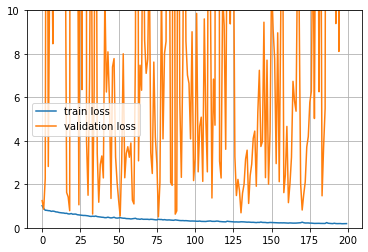

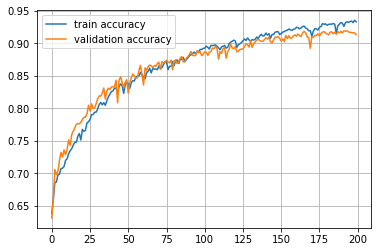

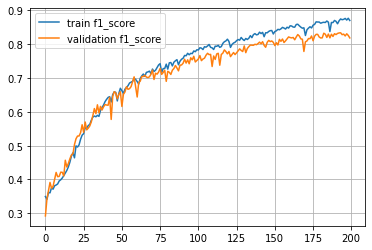

In [15]:
import matplotlib.pyplot as plt

plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.ylim([0,10])

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

In [16]:
from sklearn import metrics

pred = model.predict([df1_x_train,
                      df2_x_train,
                      df3_x_train,
                      df4_x_train,
                      df5_x_train,
                      df6_x_train,
                      df7_x_train,
                      df8_x_train,
                      entire_x_train], verbose=1)
print(metrics.classification_report(np.argmax(y_train, axis=1),np.argmax(pred, axis=1),
                                    target_names=set(df['leaktype'].values)))

840/840 [==============================] - 9s 10ms/step
              precision    recall  f1-score   support

       noise       0.91      0.98      0.94      5612
          in       0.95      0.91      0.93      3987
      normal       0.99      1.00      0.99     14409
       other       0.97      0.84      0.90      1422
         out       0.97      0.81      0.88      1450

    accuracy                           0.96     26880
   macro avg       0.96      0.91      0.93     26880
weighted avg       0.96      0.96      0.96     26880



In [17]:
from sklearn import metrics

pred = model.predict([df1_x_valid,
                      df2_x_valid,
                      df3_x_valid,
                      df4_x_valid,
                      df5_x_valid,
                      df6_x_valid,
                      df7_x_valid,
                      df8_x_valid,
                      entire_x_valid], verbose=1)
print(metrics.classification_report(np.argmax(y_valid, axis=1),np.argmax(pred, axis=1),
                                    target_names=set(df['leaktype'].values)))

210/210 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

       noise       0.83      0.93      0.88      1388
          in       0.90      0.85      0.87      1013
      normal       0.97      0.99      0.98      3591
       other       0.80      0.63      0.70       378
         out       0.80      0.56      0.66       350

    accuracy                           0.91      6720
   macro avg       0.86      0.79      0.82      6720
weighted avg       0.91      0.91      0.91      6720



### conv 256 - 128, dropout 0.8 - 0.6, dense 512
### dense 512 - 256

In [7]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train, df7_x_train,
                 df8_x_train, entire_x_train], y_train,
                 epochs=200, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, df5_x_valid,
                                                df6_x_valid, df7_x_valid, df8_x_valid, entire_x_valid],
                                                y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

2022-07-19 15:26:36.100027: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2022-07-19 15:26:39.705006: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2022-07-19 15:26:40.654777: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-19 15:26:41.590867: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


840/840 [==============================] - 27s 25ms/step - loss: 1.0310 - accuracy: 0.6318 - f1_score: 0.3426 - val_loss: 0.8938 - val_accuracy: 0.6607 - val_f1_score: 0.3480
Epoch 2/200
840/840 [==============================] - 20s 24ms/step - loss: 0.8929 - accuracy: 0.6619 - f1_score: 0.3481 - val_loss: 0.8283 - val_accuracy: 0.6799 - val_f1_score: 0.2986
Epoch 3/200
840/840 [==============================] - 20s 24ms/step - loss: 0.8470 - accuracy: 0.6744 - f1_score: 0.3489 - val_loss: 32.6186 - val_accuracy: 0.4539 - val_f1_score: 0.3048
Epoch 4/200
840/840 [==============================] - 20s 24ms/step - loss: 0.8764 - accuracy: 0.6637 - f1_score: 0.3353 - val_loss: 2.3109 - val_accuracy: 0.6704 - val_f1_score: 0.3411
Epoch 5/200
840/840 [==============================] - 20s 24ms/step - loss: 0.8165 - accuracy: 0.6826 - f1_score: 0.3533 - val_loss: 0.7839 - val_accuracy: 0.6970 - val_f1_score: 0.3676
Epoch 6/200
840/840 [==============================] - 20s 24ms/step - loss:

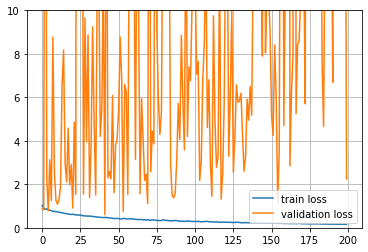

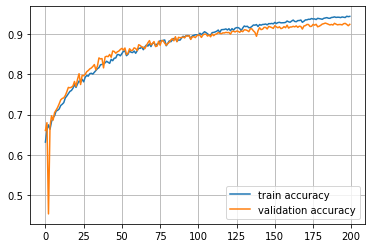

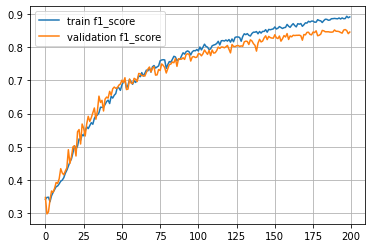

In [8]:
import matplotlib.pyplot as plt

plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.ylim([0,10])

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

In [9]:
from sklearn import metrics

pred = model.predict([df1_x_train,
                      df2_x_train,
                      df3_x_train,
                      df4_x_train,
                      df5_x_train,
                      df6_x_train,
                      df7_x_train,
                      df8_x_train,
                      entire_x_train], verbose=1)
print(metrics.classification_report(np.argmax(y_train, axis=1),np.argmax(pred, axis=1),
                                    target_names=set(df['leaktype'].values)))

840/840 [==============================] - 9s 10ms/step
              precision    recall  f1-score   support

          in       0.95      0.98      0.96      5619
       noise       0.95      0.95      0.95      3955
      normal       0.99      1.00      0.99     14442
       other       0.98      0.86      0.92      1449
         out       0.96      0.87      0.91      1415

    accuracy                           0.97     26880
   macro avg       0.97      0.93      0.95     26880
weighted avg       0.97      0.97      0.97     26880



In [10]:
from sklearn import metrics

pred = model.predict([df1_x_valid,
                      df2_x_valid,
                      df3_x_valid,
                      df4_x_valid,
                      df5_x_valid,
                      df6_x_valid,
                      df7_x_valid,
                      df8_x_valid,
                      entire_x_valid], verbose=1)
print(metrics.classification_report(np.argmax(y_valid, axis=1),np.argmax(pred, axis=1),
                                    target_names=set(df['leaktype'].values)))

210/210 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

          in       0.88      0.93      0.90      1381
       noise       0.90      0.88      0.89      1045
      normal       0.96      0.99      0.98      3558
       other       0.83      0.64      0.72       351
         out       0.83      0.66      0.73       385

    accuracy                           0.92      6720
   macro avg       0.88      0.82      0.84      6720
weighted avg       0.92      0.92      0.92      6720

